In [2]:
import pandas as pd

# Data

In [3]:
# Read
data = pd.read_csv('covid_mex_20200401.csv')

In [4]:
# 6 abril 2020
# data[(data['Region'] == 'JALISCO') & ((data['Origin'].isnull()))].sort_values('Date_Symptoms').count()
# data[(data['Region'] == 'JALISCO') & ((data['Origin'].notnull()))].count()

In [5]:
# 4 abril 2020
#data[(data['Region'] == 'JALISCO') & ((~data['Origin'].str.contains('NA')))].count()
#data[(data['Region'] == 'JALISCO') & (data['Origin'] == 'Contacto')].count()

In [6]:
# Region delta (ie, new cases)
cum_df = (data.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [7]:
# Rename because duplicate index
cum_df['Region_Delta'] = cum_df['Date_Confirmed']

In [8]:
# Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [9]:
# Clean up
cum_df = cum_df.drop(['Date_Confirmed'], axis=1)

In [10]:
# Mexico cumulative by date
cum_df['Mexico_Cumulative'] = cum_df.groupby(['Date_Confirmed'])['Region_Cumulative'].cumsum()

In [11]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

In [12]:
cum_df.to_csv('output_data/mexico/confirmed_long_format.csv')

# Tables

In [180]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T.fillna(0)

In [181]:
df = pivot_tbl_cum

In [182]:
df[['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN']].tail()

Region,CIUDAD DE MÉXICO,JALISCO,NUEVO LEÓN
Date_Confirmed,,,
3/30/2020,206.0,91.0,75.0
3/31/2020,234.0,95.0,76.0
3/6/2020,0.0,0.0,0.0
3/7/2020,235.0,0.0,0.0
4/1/2020,298.0,101.0,78.0


In [187]:
for i in range(len(df[state])):
    for state in df.columns:
        if df[state][index] >= 10:
            print((df[state]))
            print(df.index[index])
        break

KeyError: '4/1/2020'

In [207]:
for i in range(len(df[state])):
    for state in df.columns[0:]:
        if df[state][index] >= 70:
            print(df.index[index])
            if df[state][index] < 70:
                print(0)

4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4/1/2020
4

In [208]:
for state in df.columns:
    print(df.columns)
    for index in range(len(df[state])):
        if df[state][index] >= 10:
            print(df.index[index])
            print((df[state][index]))
        if df[state][index] < 10:
            print(None)

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
3/25/2020
12.0
3/26/2020
13.0
3/27/2020
19.0
None
3/29/2020
24.0
None
3/31/2020
36.0
None
None
None
Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO'

In [195]:
for state in df.columns[0:]:
    print(df.columns)
    for index in range(len(df[state])):
        if df[state][index] >= 75:
            df2 = []
            df[df[state][index])
            if df[state][index] < 75:
                print(None)
            break

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')
Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUC

In [ ]:
forfor index in range(len(df['BAJA CALIFORNIA'])):
    if df['BAJA CALIFORNIA'][index] >= 2:
        print(df.index[index])
        if df['BAJA CALIFORNIA'][index] < 2:
            print(None)
        break

In [ ]:
from numba import njit

@njit
def get_first_index_nb(col, val):
    for i in range(len(col)):
        if col[i] >= k:
            print(col[i].index)
    return -1

idx = get_first_index_nb(df['COAHUILA'].values, 10)



In [62]:
idx

15

In [66]:
next(iter(np.where(df['COAHUILA'] >=10)[0]), -1)

15

In [29]:
pivot_tbl_delta = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Delta').T

In [30]:
pivot_tbl_delta.columns

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')

In [31]:
pivot_tbl_delta.head()

Region,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
Date_Confirmed,,,,,,,,,,,,,,,,,,,,,
2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2020,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
pivot_tbl_cum.fillna(0).to_csv('output_data/mexico/confirmed_cases_by_date.csv', index=True)
pivot_tbl_delta.fillna(0).to_csv('output_data/mexico/daily_confirmed_cases_by_date.csv', index=True)

# Plots

In [34]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

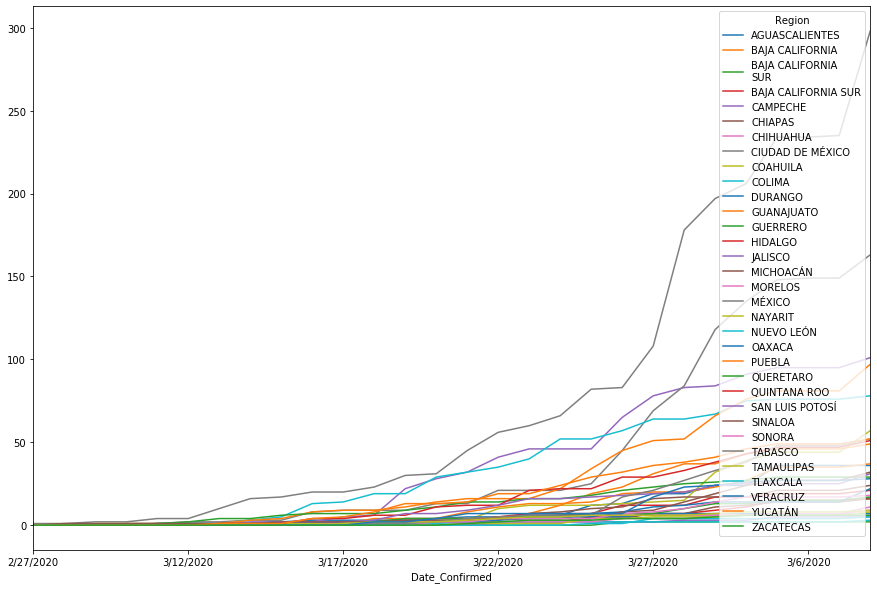

In [35]:
pivot_tbl_delta.fillna(0).cumsum().plot(figsize=(15,10))
#pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(15,10))

### Growth rate (linear)

Notice there are no dates - all we care is about the growth rate (so each region starts at day 0 from first case).

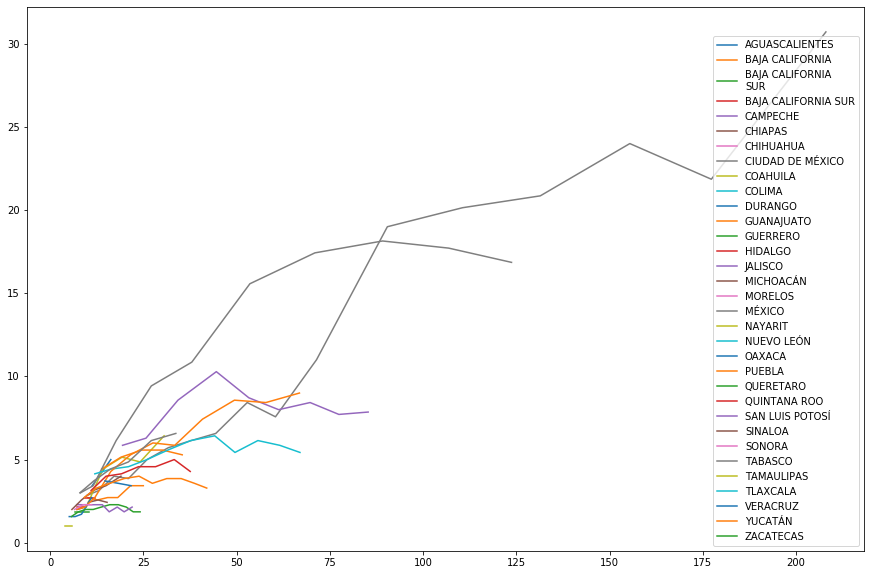

In [36]:
plt.figure(figsize=(15,10))

for state in ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('linear')

plt.show()

### Growth rate (log scale)

Now let's take a look at log scale...

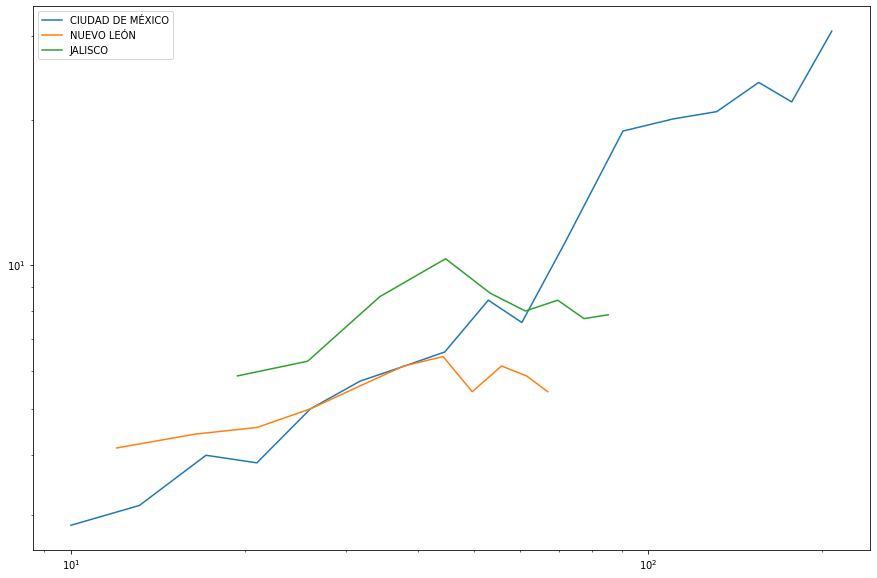

In [37]:
plt.figure(figsize=(15,10))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label = state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.show()